# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in F
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Set up lists to hold temperature, humidity, cloudiness, wind speed
name = []
country = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind_speed = []
date = []

# Loop through the cities and get weather data
print("Beginning data retrieval")    

for i, city in enumerate(cities):  
    # Get weather data
    response = requests.get(query_url + city).json()
    
    # Append weather data if available
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Processing Record {i} | {city} Appending stats")
    
    # Handle exceptions for cities with no weather data available
    except KeyError:
        print(f"Key does not exist for {city}! Skipping")
        i = i-1
        pass

print("Data retrieval complete")    

Beginning data retrieval
Processing Record 0 | rikitea Appending stats
Processing Record 1 | avarua Appending stats
Processing Record 2 | sitka Appending stats
Processing Record 3 | port alfred Appending stats
Key does not exist for taolanaro! Skipping
Processing Record 5 | mataura Appending stats
Processing Record 6 | kaitangata Appending stats
Processing Record 7 | salalah Appending stats
Processing Record 8 | norman wells Appending stats
Processing Record 9 | mattawa Appending stats
Processing Record 10 | ushuaia Appending stats
Processing Record 11 | zambezi Appending stats
Processing Record 12 | nador Appending stats
Processing Record 13 | codrington Appending stats
Processing Record 14 | havelock Appending stats
Processing Record 15 | dikson Appending stats
Processing Record 16 | takoradi Appending stats
Processing Record 17 | shakawe Appending stats
Processing Record 18 | itapuranga Appending stats
Processing Record 19 | lamu Appending stats
Processing Record 20 | sao joao da ba

Processing Record 169 | namibe Appending stats
Key does not exist for mys shmidta! Skipping
Processing Record 171 | lagoa Appending stats
Processing Record 172 | qaqortoq Appending stats
Processing Record 173 | port shepstone Appending stats
Processing Record 174 | lavrentiya Appending stats
Key does not exist for saleaula! Skipping
Processing Record 176 | mahebourg Appending stats
Processing Record 177 | esmeralda Appending stats
Key does not exist for tawkar! Skipping
Processing Record 179 | stubbekobing Appending stats
Processing Record 180 | tilichiki Appending stats
Processing Record 181 | novopokrovka Appending stats
Processing Record 182 | sohag Appending stats
Processing Record 183 | santa helena de goias Appending stats
Processing Record 184 | hualmay Appending stats
Processing Record 185 | souillac Appending stats
Processing Record 186 | machaneng Appending stats
Processing Record 187 | severo-kurilsk Appending stats
Processing Record 188 | vylkove Appending stats
Processing 

Processing Record 338 | rjukan Appending stats
Processing Record 339 | paris Appending stats
Processing Record 340 | impfondo Appending stats
Processing Record 341 | carnarvon Appending stats
Processing Record 342 | longyearbyen Appending stats
Processing Record 343 | mayor pablo lagerenza Appending stats
Processing Record 344 | jamiltepec Appending stats
Processing Record 345 | sola Appending stats
Processing Record 346 | amberley Appending stats
Processing Record 347 | cozumel Appending stats
Processing Record 348 | kuytun Appending stats
Processing Record 349 | broken hill Appending stats
Processing Record 350 | sorland Appending stats
Processing Record 351 | ongandjera Appending stats
Processing Record 352 | slochteren Appending stats
Processing Record 353 | mandalay Appending stats
Processing Record 354 | coahuayana Appending stats
Processing Record 355 | vila velha Appending stats
Processing Record 356 | am timan Appending stats
Processing Record 357 | vondrozo Appending stats
Pr

Processing Record 507 | nago Appending stats
Processing Record 508 | progreso Appending stats
Processing Record 509 | rochester Appending stats
Processing Record 510 | pavino Appending stats
Key does not exist for dien bien! Skipping
Key does not exist for samusu! Skipping
Processing Record 513 | dubbo Appending stats
Processing Record 514 | russell Appending stats
Processing Record 515 | sur Appending stats
Processing Record 516 | otradnoye Appending stats
Processing Record 517 | north bend Appending stats
Processing Record 518 | krasnoselkup Appending stats
Processing Record 519 | omboue Appending stats
Processing Record 520 | bathsheba Appending stats
Processing Record 521 | chisindia Appending stats
Processing Record 522 | almeria Appending stats
Processing Record 523 | waddan Appending stats
Processing Record 524 | skjervoy Appending stats
Processing Record 525 | onega Appending stats
Key does not exist for barbar! Skipping
Processing Record 527 | brunswick Appending stats
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
# Create a dataframe
weather_dict = {
    "City": name,
    "Latitude": lat,
    "Longitude": lng,
    "Maximum Temperature": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud, 
    "Wind Speed": wind_speed,    
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(weather_dict)

# Export into .csv
city_data.to_csv("../output/city_data.csv", encoding = "utf-8", index=False)

In [8]:
# Display the DataFrame
city_data = pd.read_csv("../output/city_data.csv")
city_data.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,72.48,77,100,16.75,PF,1601736544
1,Avarua,-21.21,-159.78,71.60,83,32,3.36,CK,1601736545
2,Sitka,57.05,-135.33,51.80,87,40,6.93,US,1601736546
3,Port Alfred,-33.59,26.89,62.17,82,91,22.21,ZA,1601736546
4,Mataura,-46.19,168.86,55.99,89,100,11.99,NZ,1601736547


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Get a statistical overview of the dataframe to determine the max value for humidity
city_data.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.857577,20.825027,65.636130,70.141049,52.376130,8.575081,1.601737e+09
std,32.555690,88.149501,18.453173,22.050214,37.827214,5.660753,1.325691e+02
min,-54.800000,-175.200000,19.810000,6.000000,0.000000,0.090000,1.601736e+09
25%,-2.920000,-54.070000,52.380000,58.000000,15.000000,3.710000,1.601737e+09
50%,24.760000,27.620000,67.800000,76.000000,58.000000,7.670000,1.601737e+09
75%,50.030000,95.320000,80.100000,87.000000,90.000000,11.410000,1.601737e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,27.510000,1.601737e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

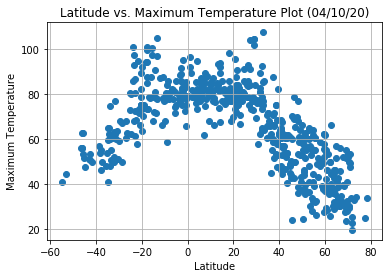

In [15]:
# Convert to floats and store Latitude and Temperature as x and y values
x_values = city_data['Latitude'].astype('float')
y_values = city_data['Maximum Temperature'].astype('float')

# Plot scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Latitude vs. Maximum Temperature Plot (04/10/20)')
plt.grid()
plt.savefig("../output/latitude_temp_plot.png")

The code is using matplotlib to create a scatterplot using two series (latitude and maximum temperature) from a dataframe containing 553 cities. The scatterplot shows that as latitude increases, the temperature decreases, and vice versa. It gets warmer towards the equator. 

## Latitude vs. Humidity Plot

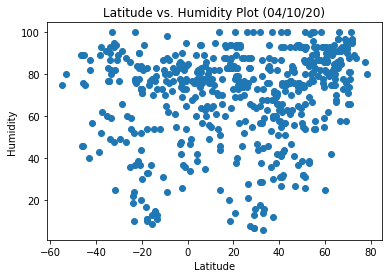

In [16]:
# Convert to floats and store Latitude and Humidity as x and y values
x_values = city_data['Latitude'].astype('float')
y_values = city_data['Humidity'].astype('float')

# Plot scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot (04/10/20)')
plt.savefig("../output/latitude_humid_plot.png")

The code is using matplotlib to create a scatterplot using two series (latitude and humidity) from a dataframe containing 553 cities. The scatterplot shows no correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

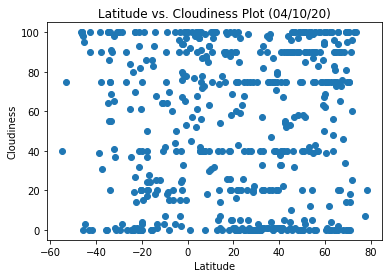

In [17]:
# Convert to floats and store Latitude and Temperature as x and y values
x_values = city_data['Latitude'].astype('float')
y_values = city_data['Cloudiness'].astype('float')

# Plot scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot (04/10/20)')
plt.savefig("../output/latitude_cloud_plot.png")

The code is using matplotlib to create a scatterplot using two series (latitude and cloudiness) from a dataframe containing 553 cities. The scatterplot shows no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

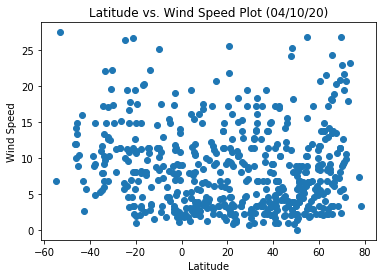

In [18]:
# Convert to floats and store Latitude and Temperature as x and y values
x_values = city_data['Latitude'].astype('float')
y_values = city_data['Wind Speed'].astype('float')

# Plot scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot (04/10/20)')
plt.savefig("../output/latitude_wind_plot.png")

The code is using matplotlib to create a scatterplot using two series (latitude and wind speed) from a dataframe containing 553 cities. The scatterplot shows there may be a weak to no positive correlation between latitude and wind speed. Recommend further analysis using the Pearson's correlation coefficient.

## Linear Regression

In [19]:
# Create Northern Hemisphere DataFrame
north_city_data = city_data.loc[city_data["Latitude"]>=0] 

# Create Southern Hemisphere DataFrame
south_city_data = city_data.loc[city_data["Latitude"]<0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6958826867968463


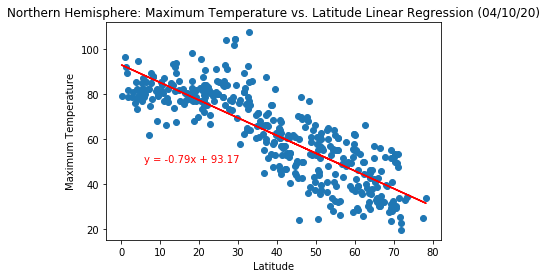

In [20]:
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_city_data['Latitude'].astype('float')
y_values = north_city_data['Maximum Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(6,50),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere: Maximum Temperature vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/north_maxtemp_regres.png")

# Show plot
plt.show()

The linear regression is modelling a moderate negative correlation between maximum temperature and latitude for 553 randomly selected cities in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4772453512749643


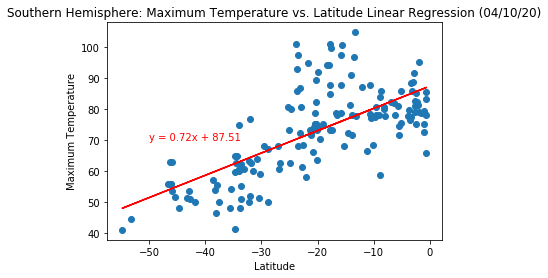

In [21]:
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_city_data['Latitude'].astype('float')
y_values = south_city_data['Maximum Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(-50,70),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere: Maximum Temperature vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/south_maxtemp_regres.png")

# Show plot
plt.show()

The linear regression is modelling a weak positive correlation between maximum temperature and latitude for 553 randomly selected cities in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.04463459672044129


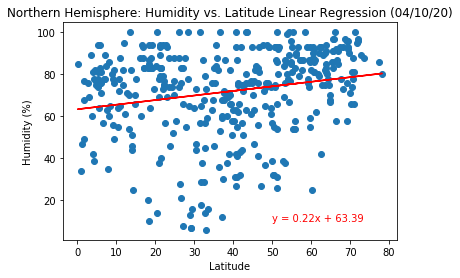

In [22]:
# Convert to floats and store variables as x and y values
x_values = north_city_data['Latitude'].astype('float')
y_values = north_city_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/north_humid_regres.png")

# Show plot
plt.show()

The linear regression for humidity and latitude in the Northern Hemisphere shows no correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00823319984958985


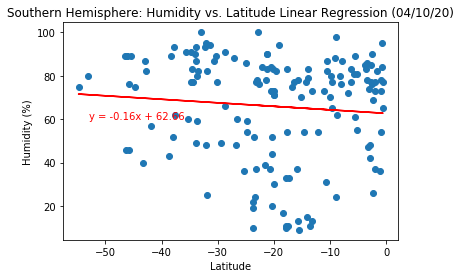

In [23]:
# Convert to floats and store variables as x and y values
x_values = south_city_data['Latitude'].astype('float')
y_values = south_city_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(-53,60),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/south_humid_regres.png")

# Show plot
plt.show()

The linear regressions show no correlation between humidity and latitude for both the Northern and Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.002251970790045511


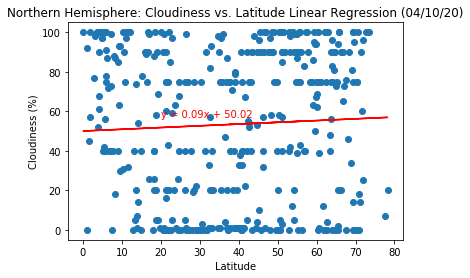

In [24]:
# Convert to floats and store variables as x and y values
x_values = north_city_data['Latitude'].astype('float')
y_values = north_city_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(20,57),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/north_cloud_regres.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.008168582285931312


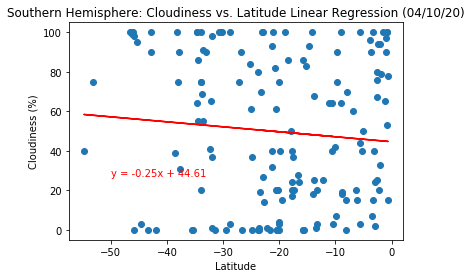

In [25]:
# Convert to floats and store variables as x and y values
x_values = south_city_data['Latitude'].astype('float')
y_values = south_city_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(-50,27),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/south_cloud_regres.png")

# Show plot
plt.show()

The linear regressions show no correlation between cloudiness and latitude for both the Northern and Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.019930383415011584


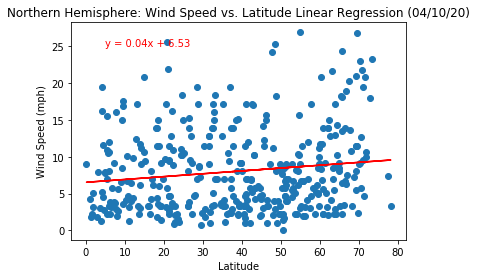

In [26]:
# Convert to floats and store variables as x and y values
x_values = north_city_data['Latitude'].astype('float')
y_values = north_city_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/north_wind_regres.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.054072299280728126


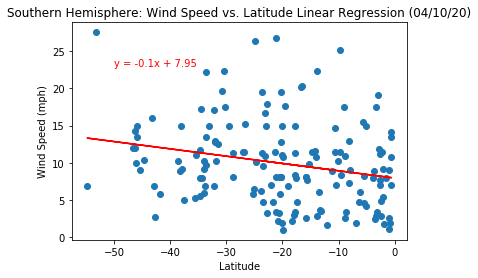

In [27]:
# Convert to floats and store variables as x and y values
x_values = south_city_data['Latitude'].astype('float')
y_values = south_city_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create equation of line
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, fit, "r-")
plt.annotate(line_eq,(-50,23),fontsize=10,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression (04/10/20)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save an image of chart
plt.savefig("../output/south_wind_regres.png")

# Show plot
plt.show()

The linear regressions show no correlation between wind speed and latitude for both the Northern and Southern Hemisphere.

There is a correlation between maximum temperature and latitude for both the Northern Hemisphere (moderate negative correlation) and Southern Hemisphere (weak positive correlation). There linear regressions show no correlation between latitude and windspeed, latitude and cloudiness, and latitude and humidity for both the Northern and Southern Hemisphere.